In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

In [4]:
m_df = pd.read_csv('movies.csv', sep=',', usecols=range(3))
r_df = pd.read_csv('ratings.csv', sep=',', usecols=range(3))

In [5]:
r_df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


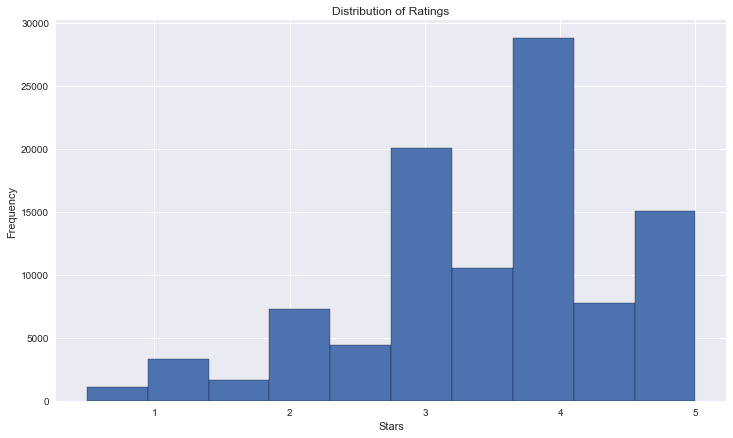

In [6]:
fig, ax = plt.subplots(figsize=(12,7))
r_df['rating'].plot.hist()
plt.xlabel('Stars')
plt.title('Distribution of Ratings')

In [7]:
m_df['genres'] = m_df['genres'].str.split('|')

In [8]:
m_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [9]:
m_df['action'] = m_df['genres'].apply(lambda x: 1 if 'Action' in x else 0)
m_df['adventure'] = m_df['genres'].apply(lambda x: 1 if 'Adventure' in x else 0)
m_df['animation'] = m_df['genres'].apply(lambda x: 1 if 'Animation' in x else 0)
m_df['children'] = m_df['genres'].apply(lambda x: 1 if "Children" in x else 0)
m_df['comedy'] = m_df['genres'].apply(lambda x: 1 if 'Comedy' in x else 0)
m_df['crime'] = m_df['genres'].apply(lambda x: 1 if 'Crime' in x else 0)
m_df['documentary'] = m_df['genres'].apply(lambda x: 1 if 'Documentary' in x else 0)
m_df['drama'] = m_df['genres'].apply(lambda x: 1 if 'Drama' in x else 0)
m_df['fantasy'] = m_df['genres'].apply(lambda x: 1 if 'Fantasy' in x else 0)
m_df['film-noir'] = m_df['genres'].apply(lambda x: 1 if 'Film-Noir' in x else 0)
m_df['horror'] = m_df['genres'].apply(lambda x: 1 if 'Horror' in x else 0)
m_df['musical'] = m_df['genres'].apply(lambda x: 1 if 'Musical' in x else 0)
m_df['mystery'] = m_df['genres'].apply(lambda x: 1 if 'Mystery' in x else 0)
m_df['romance'] = m_df['genres'].apply(lambda x: 1 if 'Romance' in x else 0)
m_df['sci-fi'] = m_df['genres'].apply(lambda x: 1 if 'Sci-Fi' in x else 0)
m_df['thriller'] = m_df['genres'].apply(lambda x: 1 if 'Thriller' in x else 0)
m_df['war'] = m_df['genres'].apply(lambda x: 1 if 'War' in x else 0)
m_df['western'] = m_df['genres'].apply(lambda x: 1 if 'Western' in x else 0)

In [10]:
m_df = m_df.drop('genres', axis=1)
m_df = m_df.set_index('movieId')
m_df.head()

,title,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
movieId,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
movie_dict = {}
for i in range(len(m_df.columns)):
    c = m_df.columns[i]
    if i > 0:
        movie_dict[c] = m_df[c].sum()

In [12]:
genres = pd.DataFrame(movie_dict.items(), columns=['genre', 'genre_count'])
genre_tot = genres['genre_count'].sum()
genres['pct_count'] = genres['genre_count']/genre_tot

In [13]:
genres = genres.sort_values('genre_count', ascending=False)
genres = genres.set_index('genre')

In [14]:
genres

,genre_count,pct_count
genre,,
drama,4365,0.216421
comedy,3315,0.164361
thriller,1729,0.085726
romance,1545,0.076603
action,1545,0.076603
adventure,1117,0.055382
crime,1100,0.054539
horror,877,0.043483
sci-fi,792,0.039268


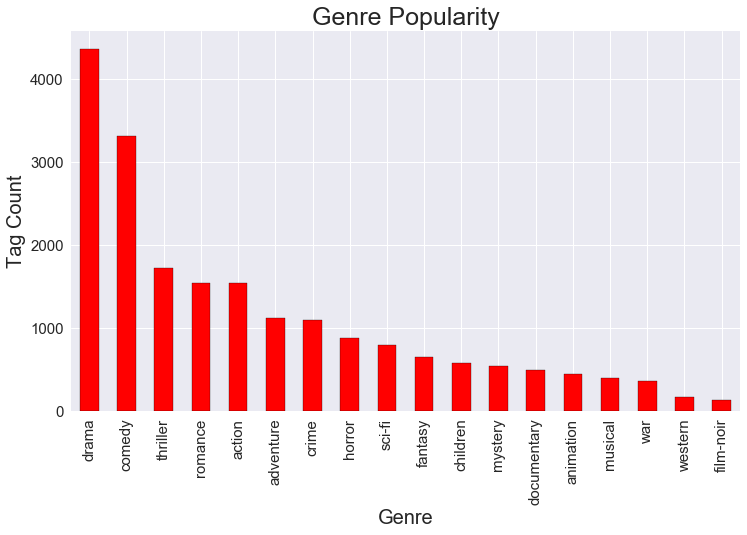

In [15]:
fig, ax = plt.subplots(figsize=(12,7))
genres['genre_count'].plot.bar(color='r')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Tag Count', fontsize=20)
plt.title('Genre Popularity', fontsize=25)

In [16]:
r_counts = pd.DataFrame(r_df.groupby('movieId')['rating'].size())
r_counts.columns = (['num_reviews'])

r_avg = pd.DataFrame(r_df.groupby('movieId')['rating'].mean())
r_avg.columns = (['avg_review'])

In [17]:
ratings = pd.merge(r_counts, r_avg, left_index=True, right_index=True)

In [18]:
ratings.head()

,num_reviews,avg_review
movieId,,
1,247,3.872470
2,107,3.401869
3,59,3.161017
4,13,2.384615
5,56,3.267857


In [19]:
movies = pd.merge(m_df, ratings, left_index=True, right_index=True)
movies = movies.drop('title', axis=1)
movies.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,num_reviews,avg_review
movieId,,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,247,3.872470
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,107,3.401869
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,59,3.161017
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,13,2.384615
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,56,3.267857


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler().fit(movies)
scaled_movies = scaler.transform(movies)

In [22]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=4)

In [23]:
nbrs = knn.fit(scaled_movies)

In [24]:
distances, indices = nbrs.kneighbors(scaled_movies)

In [25]:
sims = []
for x in range(len(indices)):
    sim_i = []
    for i in indices[x][1:4]:
        sim_i.append(m_df.iloc[i][0])
    sims.append(sim_i)

In [26]:
sim_df = pd.DataFrame(sims)
sim_df.columns = (['rec1', 'rec2', 'rec3'])

In [27]:
movie_df = m_df['title']
movie_df = movie_df.reset_index()

In [28]:
recs = pd.concat([movie_df, sim_df], axis=1)

In [29]:
recs.head(20)

,movieId,title,rec1,rec2,rec3
0,1,Toy Story (1995),Shrek (2001),"Man Who Wasn't There, The (2001)",Toy Story 2 (1999)
1,2,Jumanji (1995),When a Stranger Calls (1979),One-Way Ticket to Mombasa (Menolippu Mombasaan...,"NeverEnding Story, The (1984)"
2,3,Grumpier Old Men (1995),You've Got Mail (1998),"Truth About Cats & Dogs, The (1996)",Sabrina (1995)
3,4,Waiting to Exhale (1995),Shampoo (1975),Secret Window (2004),About Last Night... (1986)
4,5,Father of the Bride Part II (1995),Kingpin (1996),Muriel's Wedding (1994),Caddyshack (1980)
5,6,Heat (1995),Out of Time (2003),Natural Born Killers (1994),"Net, The (1995)"
6,7,Sabrina (1995),My Best Friend's Wedding (1997),Frailty (2001),10 Things I Hate About You (1999)
7,8,Tom and Huck (1995),"Incredible Journey, The (1963)",Gold Diggers: The Secret of Bear Mountain (1995),Benji (1974)
8,9,Sudden Death (1995),Under Siege 2: Dark Territory (1995),Thunderbolt and Lightfoot (1974),"Sunset Limited, The (2011)"
9,10,GoldenEye (1995),"Rock, The (1996)",Cliffhanger (1993),"Hunt for Red October, The (1990)"


In [31]:
recs[recs['title']=='Tron (1982)']

,movieId,title,rec1,rec2,rec3
1665,2105,Tron (1982),Star Trek III: The Search for Spock (1984),Land of Silence and Darkness (Land des Schweig...,Fantastic Four (2005)


movieId                                                 2105
title                                            Tron (1982)
rec1              Star Trek III: The Search for Spock (1984)
rec2       Land of Silence and Darkness (Land des Schweig...
rec3                                   Fantastic Four (2005)
Name: 1665, dtype: object